# Avacado Project

## Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              
import seaborn as sns                        
from sklearn.model_selection import train_test_split         
from sklearn.metrics import r2_score                       
from sklearn.metrics import mean_squared_error              
from sklearn.metrics import mean_absolute_error             
from sklearn.linear_model import LinearRegression           
from sklearn.tree import DecisionTreeRegressor               
from sklearn.ensemble import RandomForestRegressor          
from sklearn.model_selection import cross_val_score          
import warnings
warnings.filterwarnings('ignore')

## Importing dataset 

In [2]:
df=pd.read_csv(r"C:\Users\Harshitha\Desktop\Data Trained\Projects\avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
df.shape

(18249, 13)

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
# Display information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
# Changing Object Type variables to Categorical Type 

cols = ['Date','type','region']

for col in cols:
    df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          18249 non-null  category
 1   AveragePrice  18249 non-null  float64 
 2   Total Volume  18249 non-null  float64 
 3   4046          18249 non-null  float64 
 4   4225          18249 non-null  float64 
 5   4770          18249 non-null  float64 
 6   Total Bags    18249 non-null  float64 
 7   Small Bags    18249 non-null  float64 
 8   Large Bags    18249 non-null  float64 
 9   XLarge Bags   18249 non-null  float64 
 10  type          18249 non-null  category
 11  year          18249 non-null  int64   
 12  region        18249 non-null  category
dtypes: category(3), float64(9), int64(1)
memory usage: 1.5 MB


In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
df.shape

(18249, 13)

<AxesSubplot:>

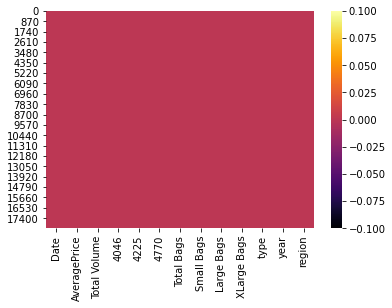

In [13]:
sns.heatmap(df.isnull(),cmap ='inferno')

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

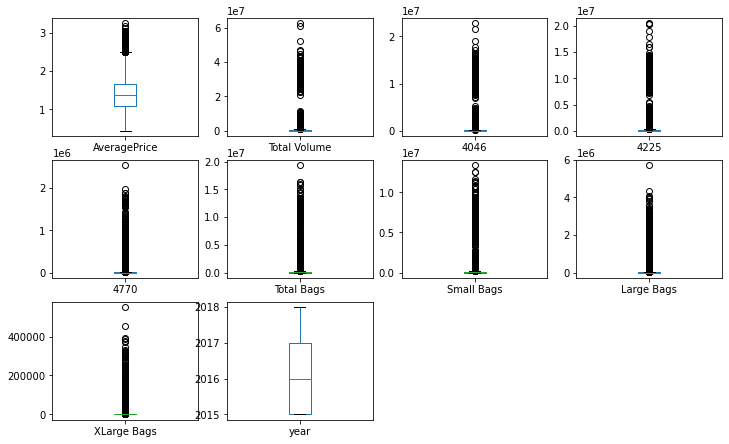

In [14]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(12,10))

In [15]:
# Performing Label Encoder for categorical Values.

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df['Date'] = Le.fit_transform(df['Date'])
df['type'] = Le.fit_transform(df['type'])
df['region'] = Le.fit_transform(df['region'])

In [25]:
#Compute Outliers using zscore method

from scipy.stats import  zscore
z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]

In [26]:
df_new.shape

(17651, 13)

In [27]:
#Checking Outliers Percentage

((18249-17651)/18249)*100

3.276891884486821

In [28]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.67635986, 0.18868864, 0.22771641, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13901962, 0.23042664, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18206895, 0.21208462, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15237477, 0.24233073, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 1.30138182, 0.24162464, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.53151208, 0.24125273, ..., 1.00016441, 1.97050371,
        1.70081131]])

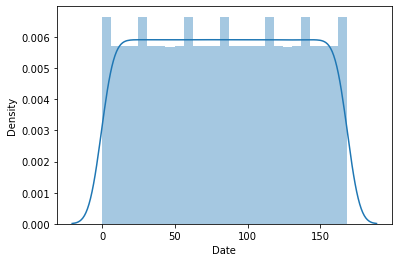

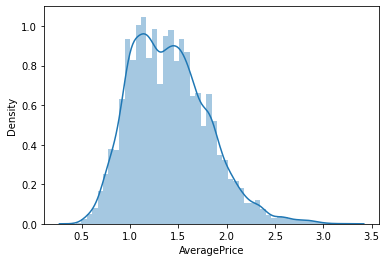

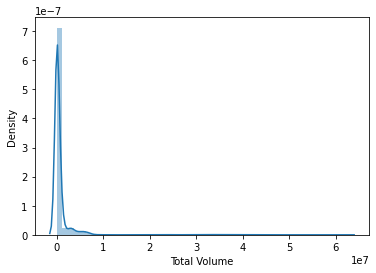

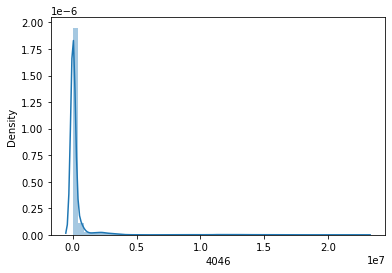

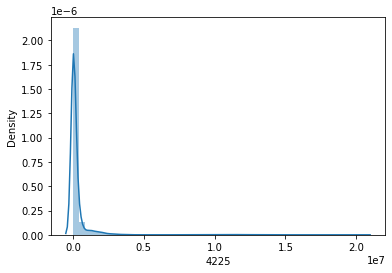

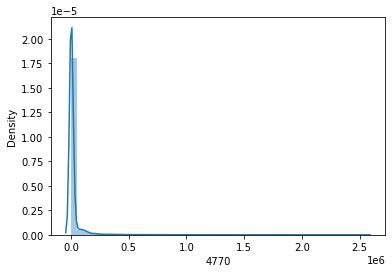

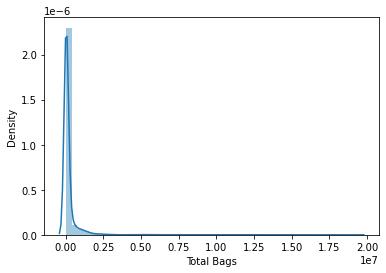

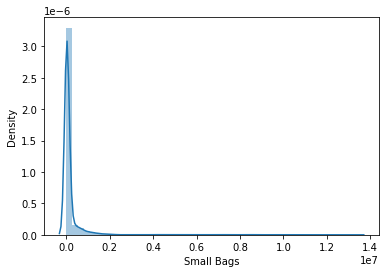

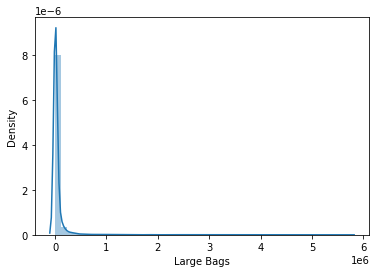

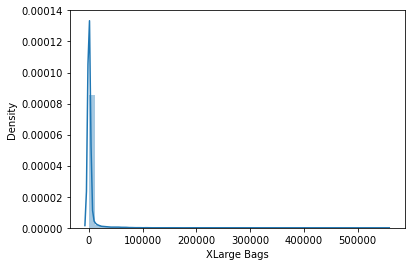

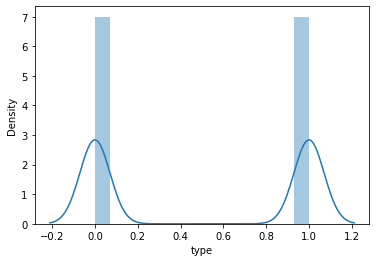

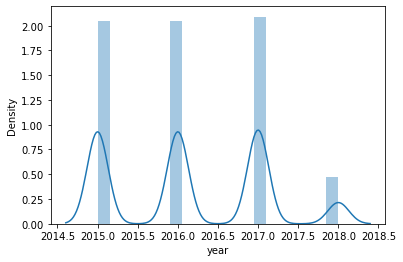

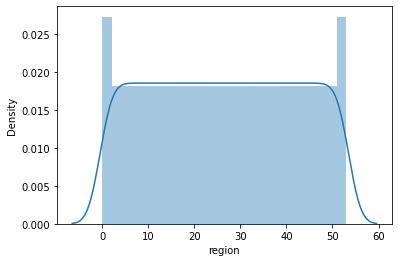

In [29]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

In [30]:
df_new.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [31]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df)
df_new=pd.DataFrame(df_new,columns=df.columns)

In [32]:
df_new.skew()

Date           -0.277806
AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
dtype: float64

In [33]:
#splitting the data

In [35]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the AveragePrice of the Avacado , we will drop the ‘AveragePrice’ column.

X = df_new.drop('AveragePrice',axis=1)
y = df_new['AveragePrice']

In [36]:

x=df_new

In [37]:
print(x.shape)
print(y.shape)

(18249, 13)
(18249,)


In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [39]:
maxAcc=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('best r2_score:',maxAcc,'with random_state:',maxRS)

best r2_score: 1.0 with random_state: 1


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [42]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
GBR = GradientBoostingRegressor()
KN = KNeighborsRegressor()
RD = Ridge()
SV = SVR()


In [44]:
model=[LR,DT,RF,GBR,KN,RD,SV]

In [45]:
Models = [LR,DT,RF,GBR,KN,RD,SV]

for m in Models:
    print(m)
    print("\n")
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("r2_score is :",r2_score(y_test,pred))
    print("Mean_Squared_Error is :",mean_squared_error(y_test,pred))
    print("Mean_Absolute_Error is :",mean_absolute_error(y_test,pred))
    print("Root_Mean_Squared_Error is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n\n")

LinearRegression()


r2_score is : 1.0
Mean_Squared_Error is : 2.9176722871272472e-30
Mean_Absolute_Error is : 1.4851045304732718e-15
Root_Mean_Squared_Error is: 1.7081195178111065e-15



DecisionTreeRegressor()


r2_score is : 0.9999902898973716
Mean_Squared_Error is : 9.664708632726482e-06
Mean_Absolute_Error is : 0.00012891364591576803
Root_Mean_Squared_Error is: 0.0031088114501729566



RandomForestRegressor()


r2_score is : 0.9999892790655902
Mean_Squared_Error is : 1.0670814852007527e-05
Mean_Absolute_Error is : 9.65744076044638e-05
Root_Mean_Squared_Error is: 0.003266621320570771



GradientBoostingRegressor()


r2_score is : 0.9999448145280074
Mean_Squared_Error is : 5.4927484083443596e-05
Mean_Absolute_Error is : 0.0050894789450880926
Root_Mean_Squared_Error is: 0.00741130785242683



KNeighborsRegressor()


r2_score is : 0.9692415024448913
Mean_Squared_Error is : 0.030614703904628813
Mean_Absolute_Error is : 0.12855958096077627
Root_Mean_Squared_Error is: 0.17497058011171138

## Hyper parameter tuning

In [47]:
from sklearn.model_selection import  GridSearchCV

In [52]:
parameter = {'n_estimators': [5,50],
          'max_depth': [2,4],
          'min_samples_split': [2,5],
          'learning_rate': [0.01,0.1]}

In [49]:
for c in Models:
    cvs = cross_val_score(c,X,y,cv=5)
    print('Cross Validation SCore for',c,'model is :',cvs.mean())
    print('Difference between r2_score and cross validation score is :',r2_score(y_test,pred)-cvs.mean())
    print('\n')

Cross Validation SCore for LinearRegression() model is : 0.22213438888983972
Difference between r2_score and cross validation score is : 0.7753804568440265


Cross Validation SCore for DecisionTreeRegressor() model is : -0.028117612991120165
Difference between r2_score and cross validation score is : 1.0256324587249863


Cross Validation SCore for RandomForestRegressor() model is : 0.4571406315695226
Difference between r2_score and cross validation score is : 0.5403742141643435


Cross Validation SCore for GradientBoostingRegressor() model is : 0.5161194571604389
Difference between r2_score and cross validation score is : 0.48139538857342723


Cross Validation SCore for KNeighborsRegressor() model is : 0.2524573964387946
Difference between r2_score and cross validation score is : 0.7450574492950716


Cross Validation SCore for Ridge() model is : 0.22226260535117776
Difference between r2_score and cross validation score is : 0.7752522403826885


Cross Validation SCore for SVR() model is

In [50]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [51]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 4],
                         'min_samples_split': [2, 5], 'n_estimators': [5, 50]})

In [53]:

GCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [54]:
#Building Final Model

In [55]:
Avacado_Model = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 4,n_estimators = 50,min_samples_split=5)
Avacado_Model.fit(x_train,y_train)
pred=Avacado_Model.predict(x_test)
r2score=r2_score(y_test,pred)
print('R2_score of best fitted model is :',r2score*100)
print('Mean_Squared_error is:',mean_squared_error(y_test,pred))
print('Mean_Absolute_error is :',mean_absolute_error(y_test,pred))
print('Root_Mean_squared_Error is :',np.sqrt(mean_squared_error(y_test,pred)))

R2_score of best fitted model is : 99.99551096215261
Mean_Squared_error is: 4.468051934854175e-05
Mean_Absolute_error is : 0.0043990469143510465
Root_Mean_squared_Error is : 0.006684348835043078


Our model learnt almost 99.9%

In [56]:
cvs = cross_val_score(Avacado_Model,X,y,cv=5)
print('Cross validation score of Gradient Boosting Regressor is :',cvs.mean())

Cross validation score of Gradient Boosting Regressor is : 0.5098862509207182


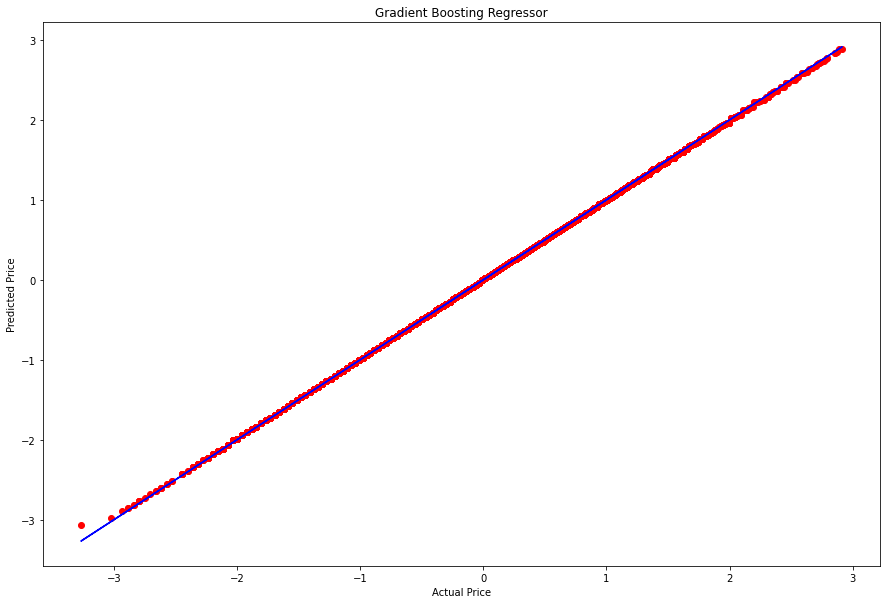

In [57]:
# plotting the Model

plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting Regressor')
plt.show()

In [58]:
import pickle

Model_Name = 'Avacado_Project.pkl'
pickle.dump(Avacado_Model,open(Model_Name,'wb'))